In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú

print(train_data_path)
print(sub_data_path)

/home/ssac19/aiffel/kaggle_kakr_housing/data/train.csv
/home/ssac19/aiffel/kaggle_kakr_housing/data/test.csv


## 1. Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
pandasÏùò read_csv Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏Î•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µ Ïàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)

In [4]:
#Îç∞Ïù¥ÌÑ∞Î•º Í∞ÅÍ∞Å data,subÎ°ú Î∂àÎü¨Ïò®Îã§.
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


In [5]:
#yÏóê Í∞ÄÍ≤©Ï†ïÎ≥¥ ÏπºÎüºÏùÑ Ìï†ÎãπÌïòÍ≥†, Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÍ≤©ÏπºÎüº ÏßÄÏö∞Í∏∞.
y = data['price']

del data['price']

In [6]:
train_len = len(data) # train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Î•º Ï†ÄÏû•Ìï¥ÏÑú Ìï©Ï≥êÏßÑ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Îßå Îî∞Î°ú ÎπºÏò¨ Ïàò ÏûàÎèÑÎ°ù ÌïòÍ∞Ä.
data = pd.concat((data, sub), axis=0) # dataÍ∞Ä trainÏö©, subÍ∞Ä testÏö©

In [7]:
data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  20141013T000000         3       1.00         1180      5650     1.0   
1   1  20150225T000000         2       1.00          770     10000     1.0   
2   2  20150218T000000         3       2.00         1680      8080     1.0   
3   3  20140627T000000         3       2.25         1715      6819     2.0   
4   4  20150115T000000         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      6         770              0      1933   
2           0     0          3      8        1680              0      1987   
3           0     0          3      7        1715              0      1995   
4           0     0          3      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711

## 2. Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨ 
Í∞Å Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ Í≤∞Ï∏° Ïú†Î¨¥Î•º ÌôïÏù∏ÌïòÍ≥†, Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Î≥¥Î©¥ÏÑú Í∞ÑÎã®ÌïòÍ≤å Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ≤†ÏäµÎãàÎã§.
### Í≤∞Ï∏°Ïπò ÌôïÏù∏
Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.<br>
missingno ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò matrix Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏° ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

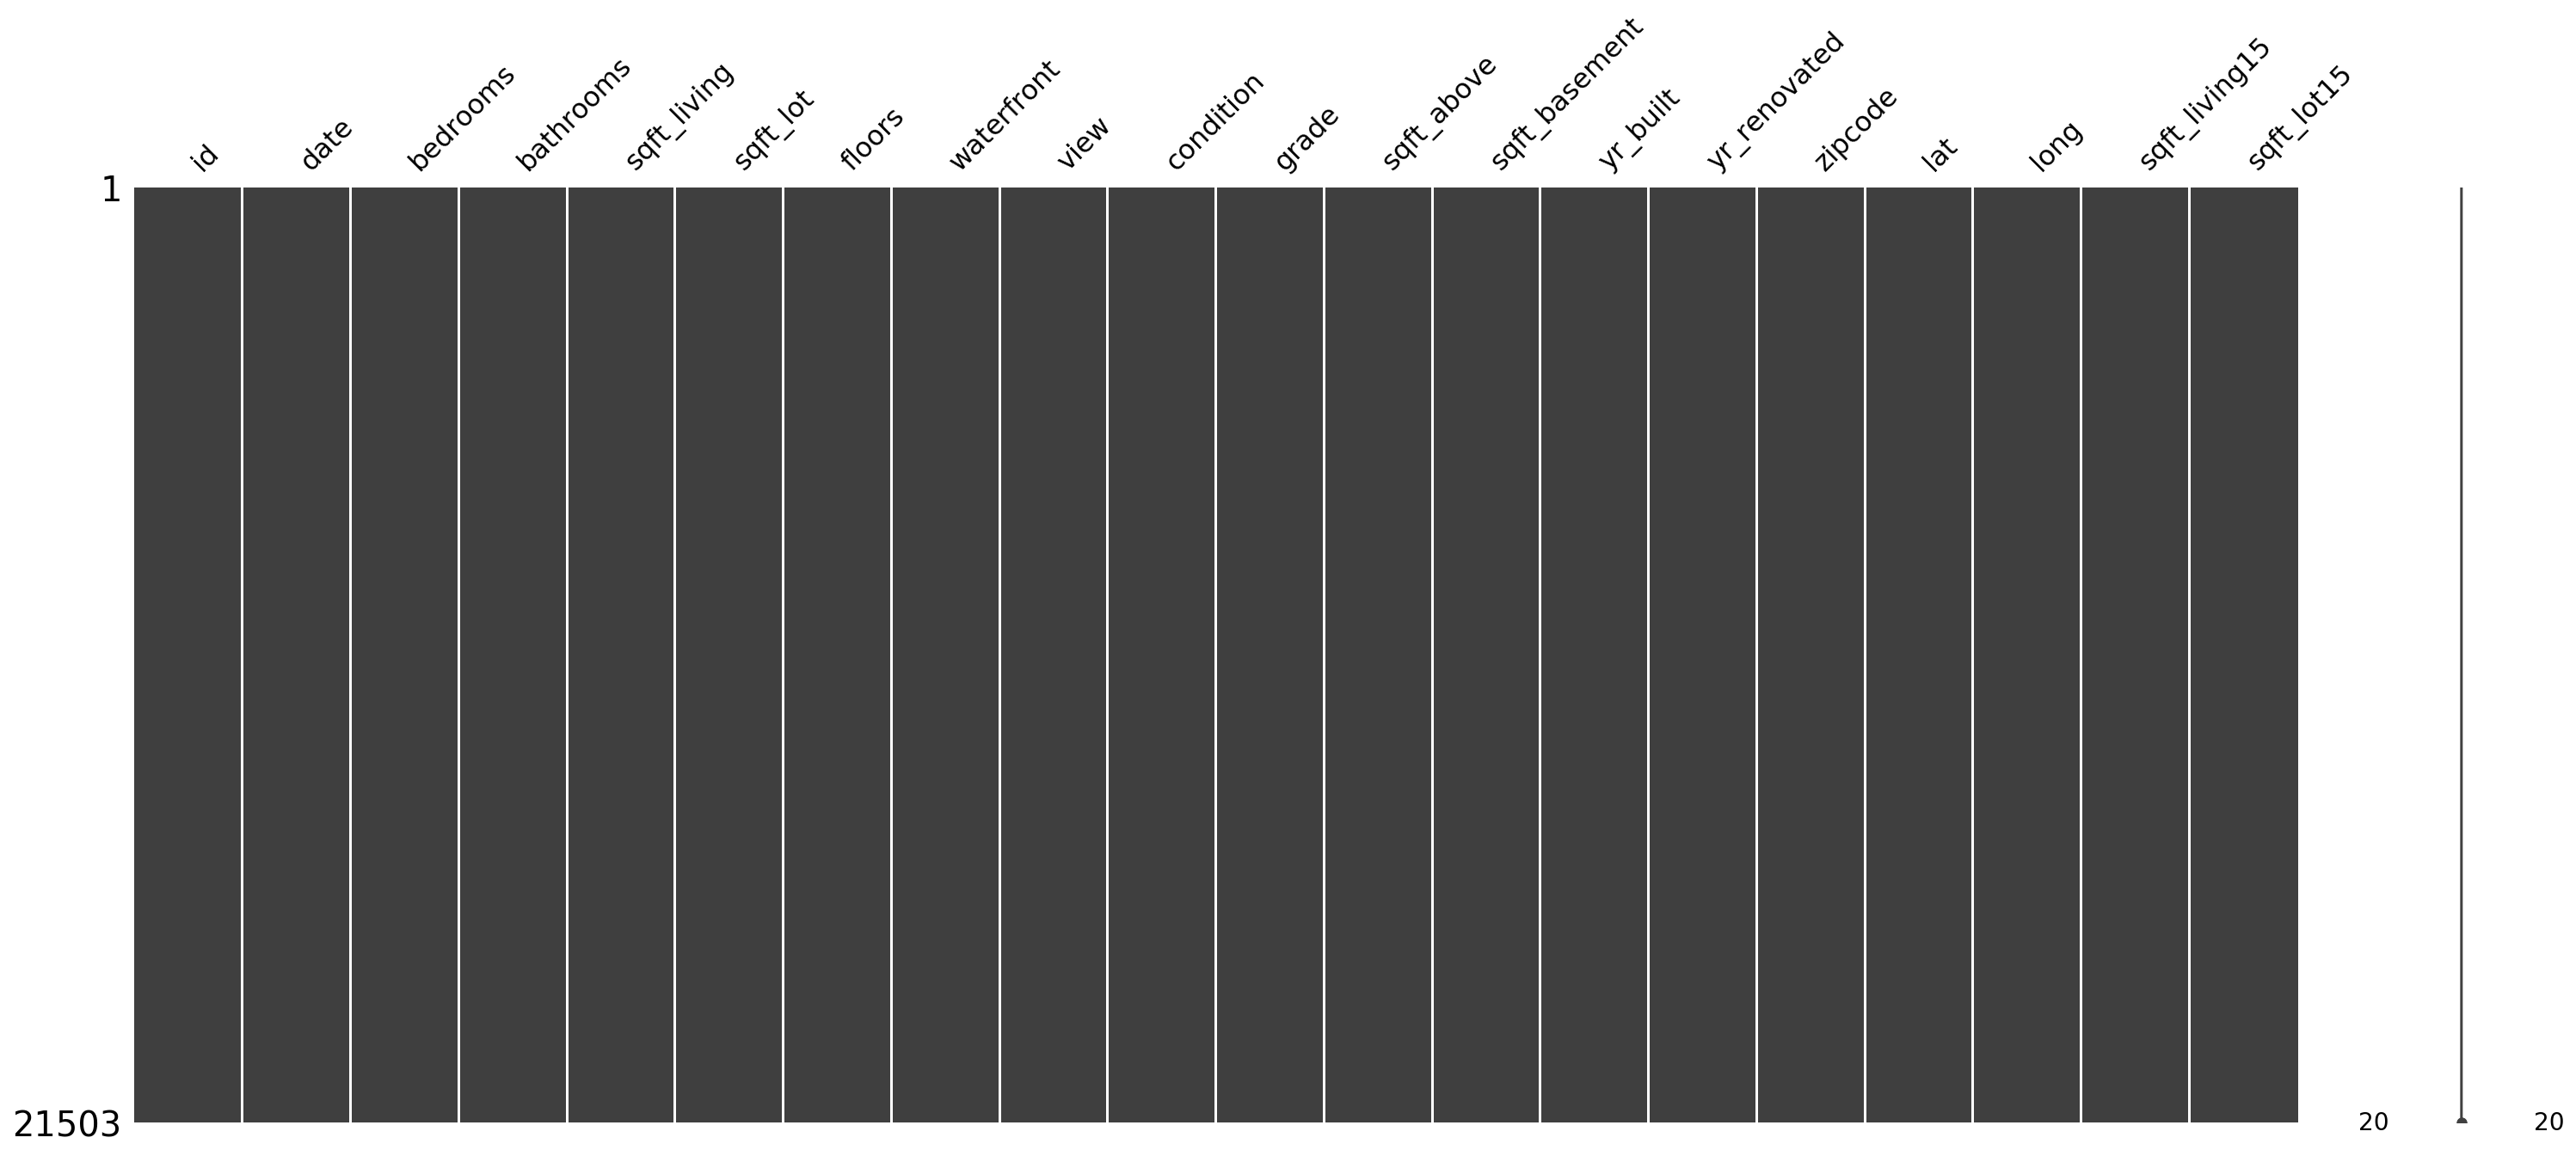

In [8]:
msno.matrix(data)

Î™®Îì† Î≥ÄÏàòÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå, ÌòπÏãú Î™®Î•¥Îãà ÌôïÏã§ÌïòÍ≤å ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§. Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏúºÎ©¥ Ìï¥ÎãπÎ∂ÄÎ∂ÑÏù¥ ÌïòÏñóÍ≤å ÎÇòÏòµÎãàÎã§.<br>

In [9]:
for c in data.columns: #Í∞Å ÏπºÎüºÎßàÎã§ Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî ÏΩîÎìú
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


### id, date Î≥ÄÏàò Ï†ïÎ¶¨
id Î≥ÄÏàòÎäî Î™®Îç∏Ïù¥ ÏßëÍ∞íÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï£ºÏßÄ ÏïäÏúºÎØÄÎ°ú Ï†úÍ±∞Ìï©ÎãàÎã§.<br>
date Î≥ÄÏàòÎäî Ïó∞ÏõîÏùºÏãúÍ∞ÑÏúºÎ°ú Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÎç∞, Ïó∞ÏõîÎßå Í≥†Î†§ÌïòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [10]:
sub_id = data['id'][train_len:]#ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞Ïùò ÏïÑÏù¥Îîî Í∞íÎì§ÏùÑ Îî∞Î°ú Ï†ÄÏû•.
del data['id']
data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(str) 
# ÎÇ†Ïßú ÏπºÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏïûÏóêÏÑúÎ∂ÄÌÑ∞ 6Í∏ÄÏûêÍπåÏßÄÎßå ÏûêÎ•¥Í∏∞.(ÎÖÑÎèÑ,Ïõî)

### Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Îäî Î™®Îç∏Ïù¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÍ∏∞Ïóê Ï¢ãÏßÄ ÏïäÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Îã§Îì¨Ïñ¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

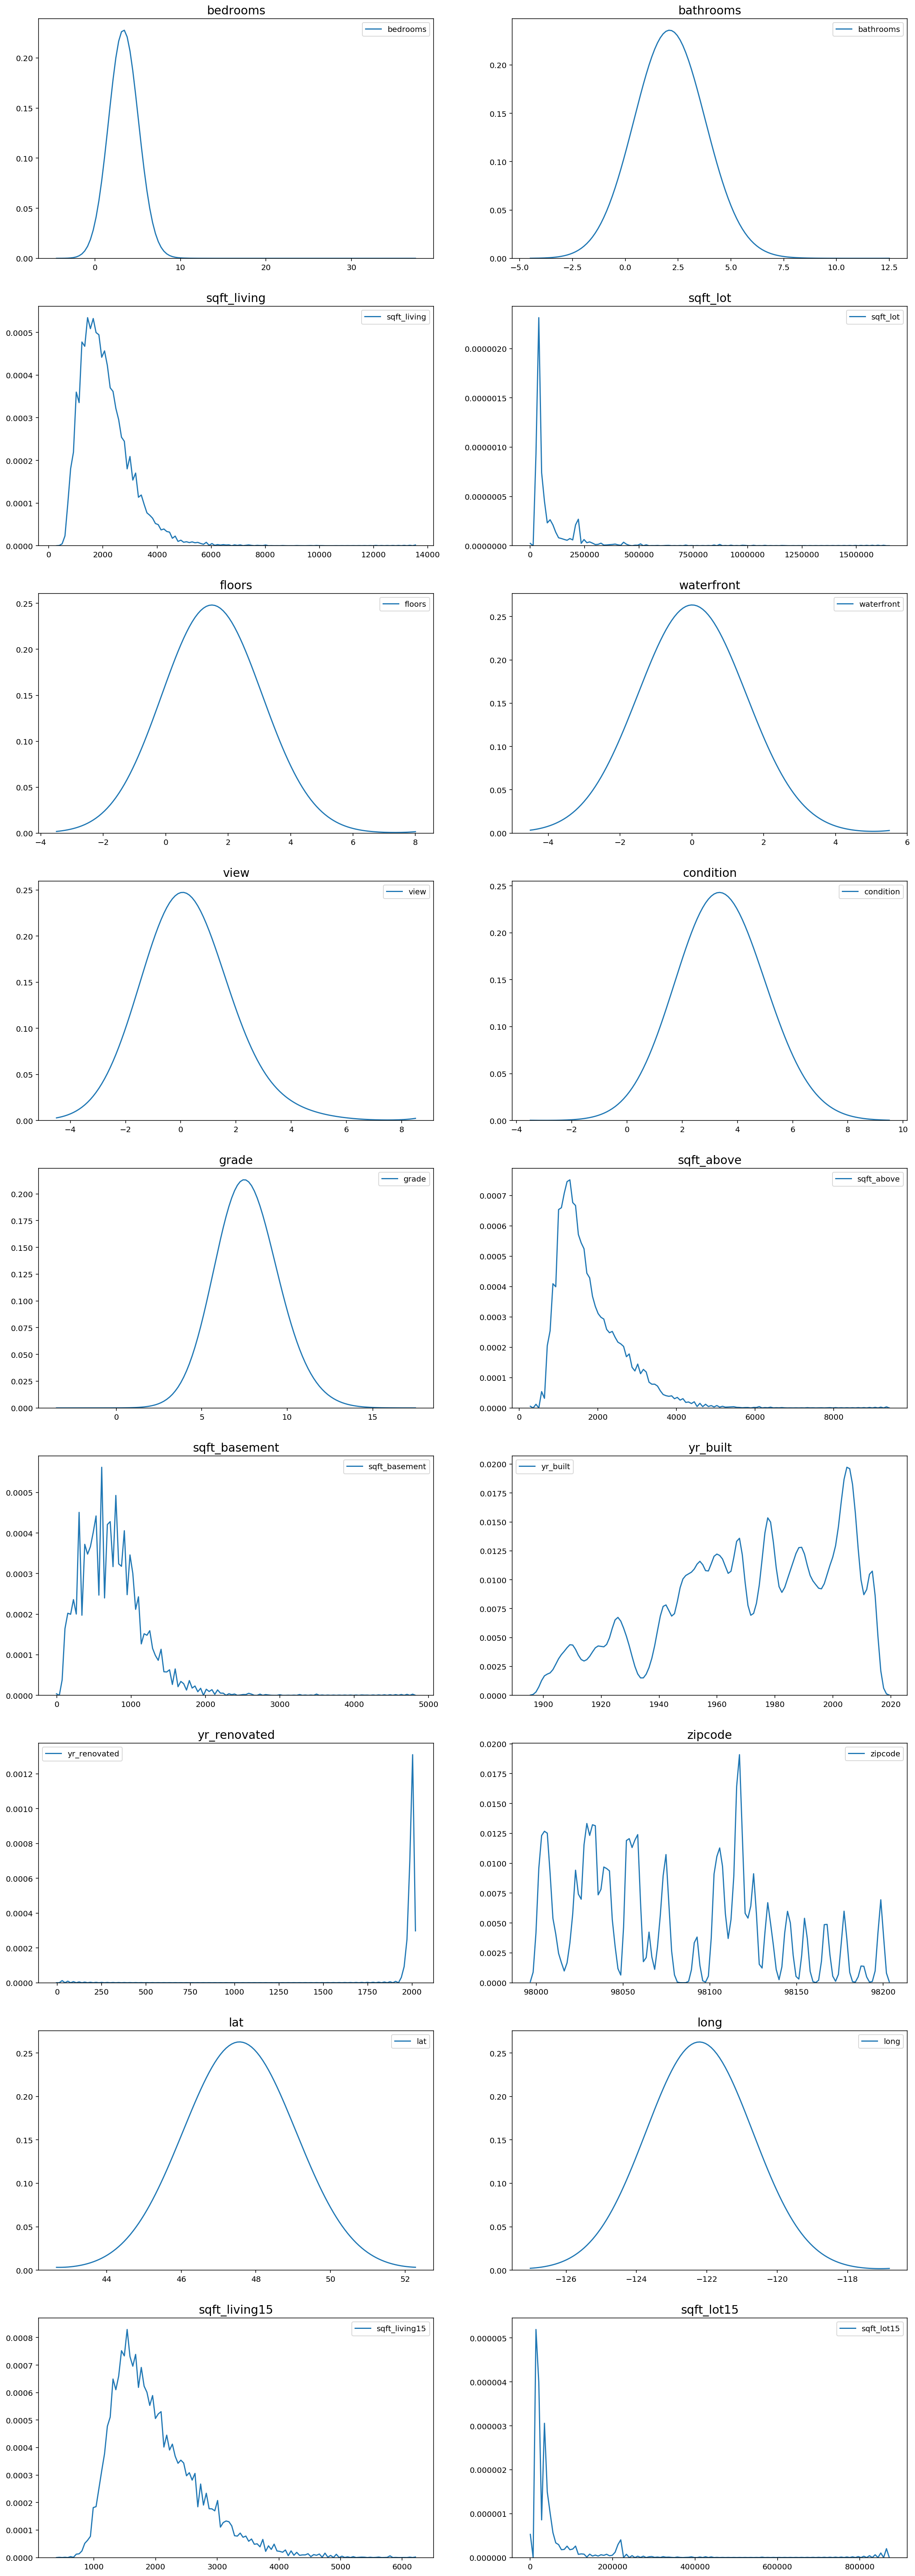

In [11]:
fig, ax = plt.subplots(9, 2, figsize=(20, 60)) # Í∞í, ÏïÑÏù¥Îîî ÏπºÎüºÏùÑ ÏßÄÏõ†Í∏∞Ïóê 18Í∞ú Ìï≠Î™©ÏùÑ 9X2 Í∑∏ÎûòÌîÑÎ°ú ÌëúÌòÑ
#Í∑∏ÎûòÌîÑ Í∞ÄÎ°ú ÌÅ¨Í∏∞Í∞Ä Ïª§ÏÑú Ïä§ÌÅ¨Î°§Î∞îÍ∞Ä ÏÉùÍ∏∞Î©¥ 20ÏóêÏÑú Ï§ÑÏù¥Í∏∞.
# id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data[columns[count]], ax=ax[row][col], bw=1.5)
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

price, bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.<br>
log-scalingÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [12]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
#numpy.log1p()Îäî Í∞Å ÏûÖÎ†•Î∞∞Ïó¥Ïùò ÏöîÏÜåÎ•º ÏûêÏó∞Î°úÍ∑∏ log(1+x)Î°ú Î∞òÌôò
for c in skew_columns:
    data[c] = np.log1p(data[c].values)

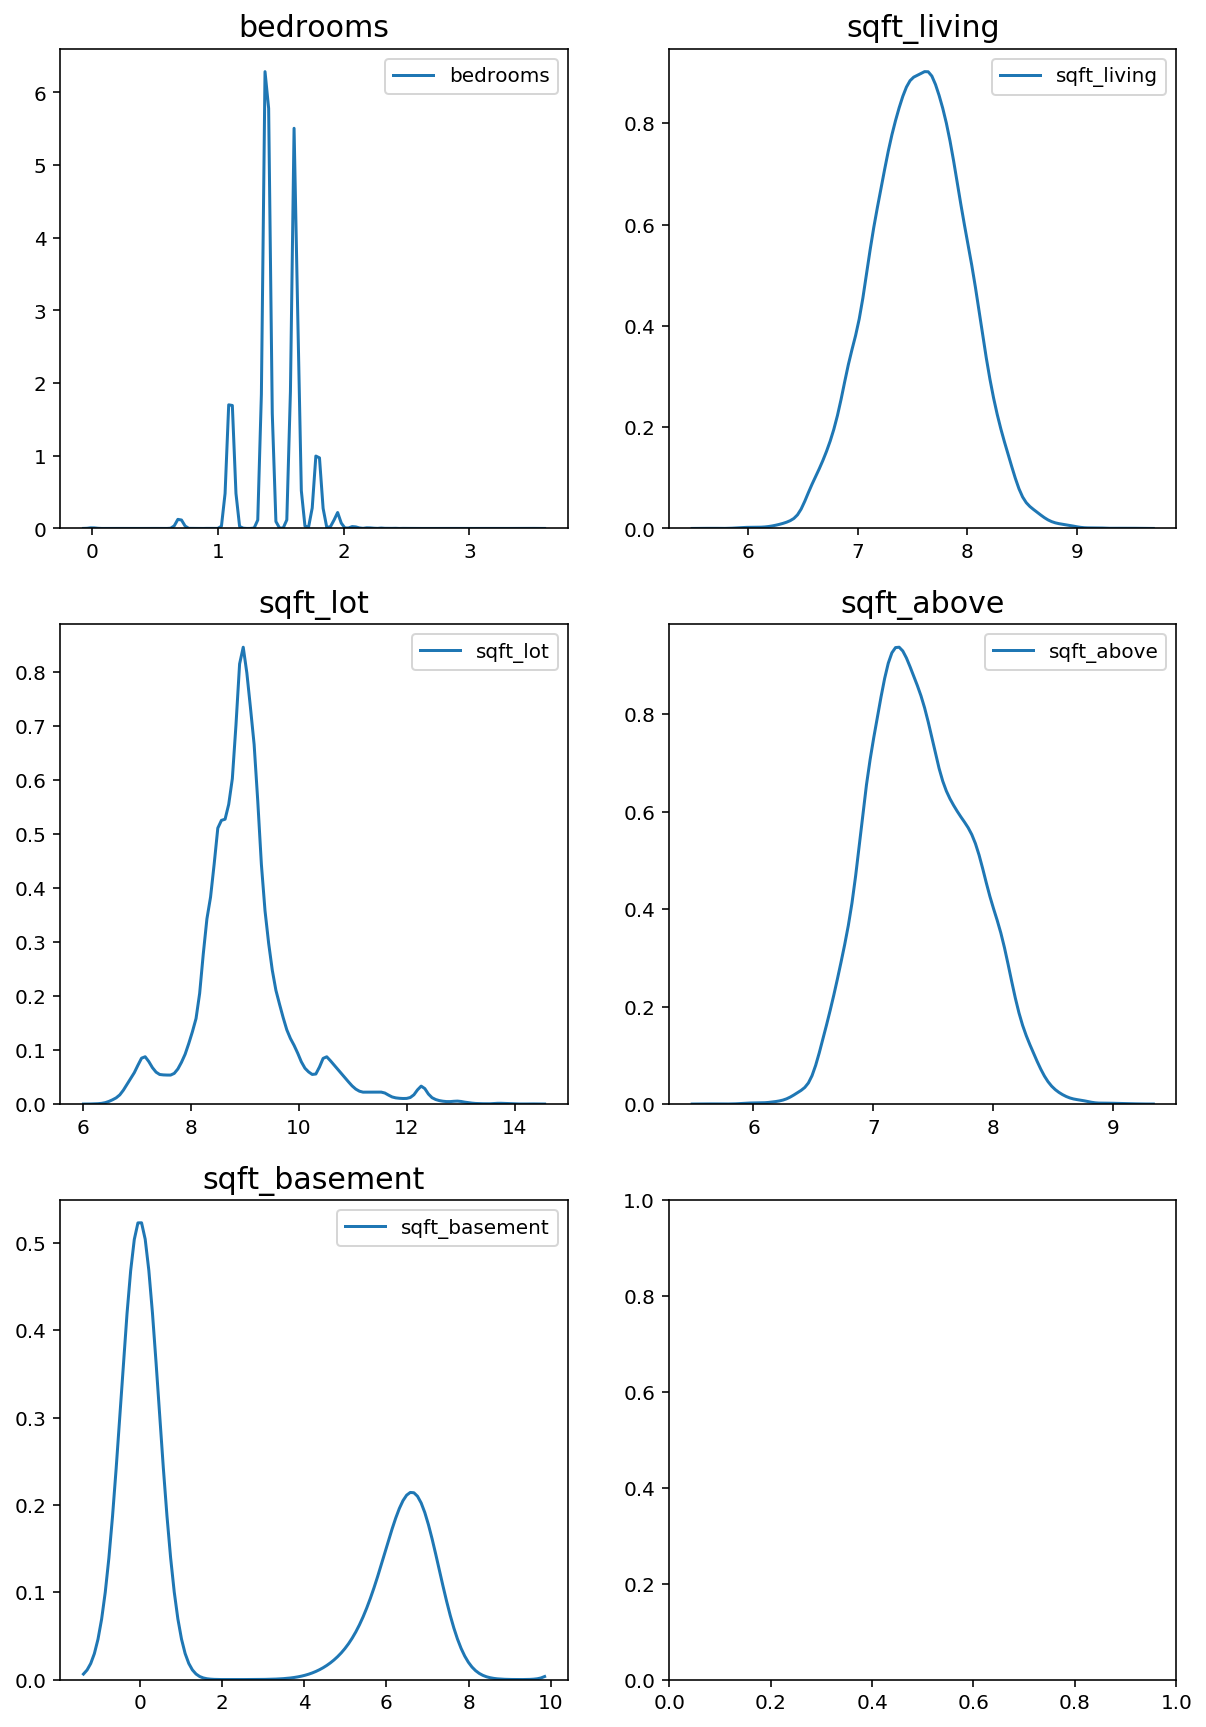

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15)) #ÏúÑÏùò 5Í∞ÄÏßÄÎ•º Îã§Ïãú Í∑∏ÎûòÌîÑÎ°ú ÌëúÌòÑ

count = 0
for row in range(3):
    for col in range(2):
        if count == 5:
            break
        sns.kdeplot(data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1



Ïñ¥ÎäêÏ†ïÎèÑ ÏπòÏö∞Ïπ®Ïù¥ Ï§ÑÏñ¥Îì† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

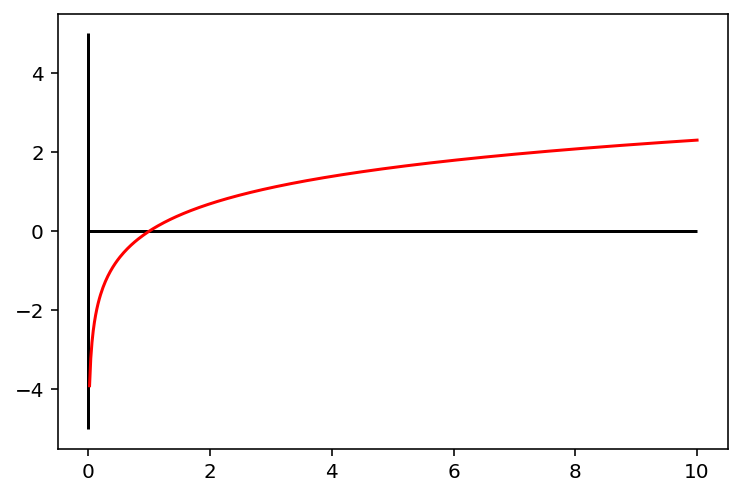

In [14]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

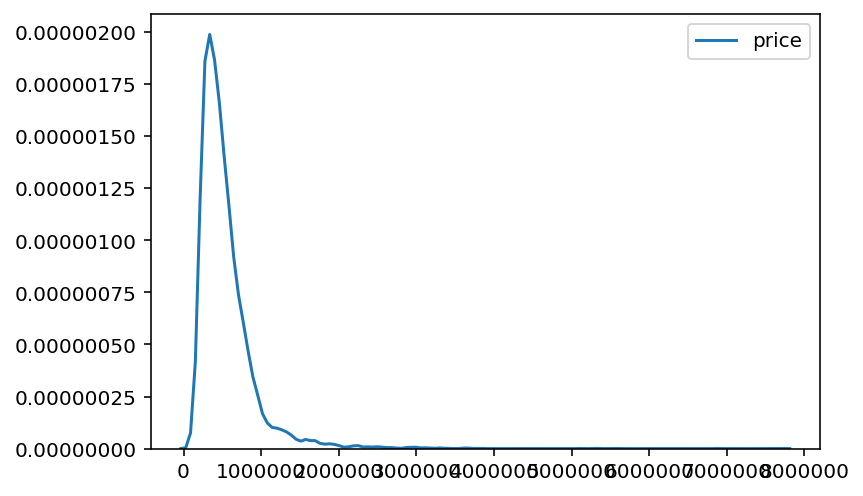

In [15]:
#price data Î∂ÑÌè¨
sns.kdeplot(y)
plt.show()

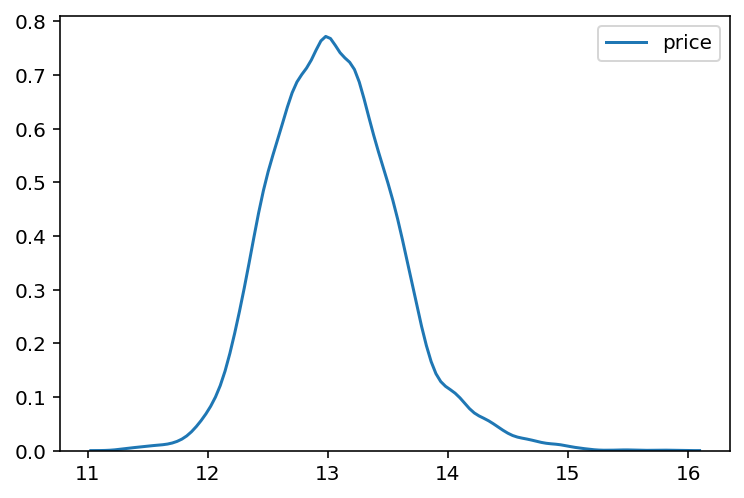

In [16]:
y_log_transformation = np.log1p(y)
#price data Î°úÍ∑∏ Î≥ÄÌôòÌõÑ Î∂ÑÌè¨
sns.kdeplot(y_log_transformation)
plt.show()

In [17]:
sub = data.iloc[train_len:, :]# testÏö© Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎàÑÍ∏∞
x = data.iloc[:train_len, :]#trainÏö© Îç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎàÑÍ∏∞.

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


## 3. Î™®Îç∏ÎßÅ
### Average Blending
Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà† ÌèâÍ∑†ÏùÑ ÌÜµÌï¥ Blending Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [18]:
gboost = GradientBoostingRegressor(random_state=2019) # Î∂ÄÏä§ÌåÖ Í≥ÑÏó¥ Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞.
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

### Cross Validation
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

In [19]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(x.values) # train Îç∞Ïù¥ÌÑ∞Î•º 5Í∞úÎ°ú ÎÇòÎàÑÏñ¥ cross validation.
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], x.values, y)), 
                                             kf=kfold))

In [20]:
get_cv_score(models)

Model GradientBoosting CV score : 0.8597
Model XGBoost CV score : 0.8861
Model LightGBM CV score : 0.8819


### Make Submission

ÌöåÍ∑Ä Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî cross_val_score Ìï®ÏàòÍ∞Ä R<sup>2</sup>Î•º Î∞òÌôòÌï©ÎãàÎã§.<br>
R<sup>2</sup> Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÌëúÌòÑÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 3Í∞ú Ìä∏Î¶¨ Î™®Îç∏Ïù¥ ÏÉÅÎãπÌûà ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏäµÎãàÎã§.<br> ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 3Í∞ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥†, Average Blending(models ÎîïÏÖîÎÑàÎ¶¨ÏïàÏùò Î™®Îç∏ÏùÑ Î™®Îëê x, yÎ°ú ÌïôÏäµÏãúÌÇ®Îí§Ïóê predictionsÏóê ÏòàÏ∏°Í≤∞Í≥ºÍ∞í ÌèâÍ∑†Í∞íÏùÑ ÎßåÎì†Îã§.

In [21]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [22]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6468


array([ 529966.66304912,  430726.21272617, 1361676.91242777, ...,
        452081.69137012,  341572.97685942,  421725.1231835 ])

In [23]:
#Ï£ºÏñ¥ÏßÑ sample.csv Î≥¥Í∏∞
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()


id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [24]:
sub = pd.DataFrame(data={'id':sub_id,'price':y_pred})
sub.head()

id         price
0  15035  5.299667e+05
1  15036  4.307262e+05
2  15037  1.361677e+06
3  15038  3.338036e+05
4  15039  3.089006e+05

In [25]:
#submission ÌååÏùº Ï†ÄÏû•.
my_submission_path = join(data_dir, 'submission.csv')
sub.to_csv(my_submission_path, index=False)
print(my_submission_path)


/home/ssac19/aiffel/kaggle_kakr_housing/data/submission.csv


# Ï†úÏ∂ú ÌîÑÎ°úÏ†ùÌä∏ ÏãúÏûë!

In [26]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('Ïñçüí¢')

Ïñçüí¢


In [27]:
train.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [28]:
#ÏúÑÏùò ÌëúÏóêÏÑú dateÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßÄÏ†ÄÎ∂ÑÌï¥ÏÑú Ï†ïÏàòÌòï 6ÏûêÎ¶¨Î°ú Ï†ïÎ¶¨!
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [29]:
#priceÍ∞Ä ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú Îî∞Î°ú Ï†ÄÏû•ÌïòÍ≥† trainÎç∞Ïù¥ÌÑ∞ÏóêÏÑú ÎπºÍ∏∞. 
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [30]:
#idÎèÑ Ï†úÍ±∞
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [31]:
#testÎç∞Ïù¥ÌÑ∞ÏóêÏÑúÎèÑ ÎèôÏùºÌïú ÏûëÏóÖÏùÑ Ïã§Ìñâ. testÎç∞Ïù¥ÌÑ∞ÏóêÎäî priceÍ∞Ä ÏóÜÏúºÎØÄÎ°ú idÎßå Ï†úÍ±∞
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [32]:
#price Ï†ïÎ≥¥
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

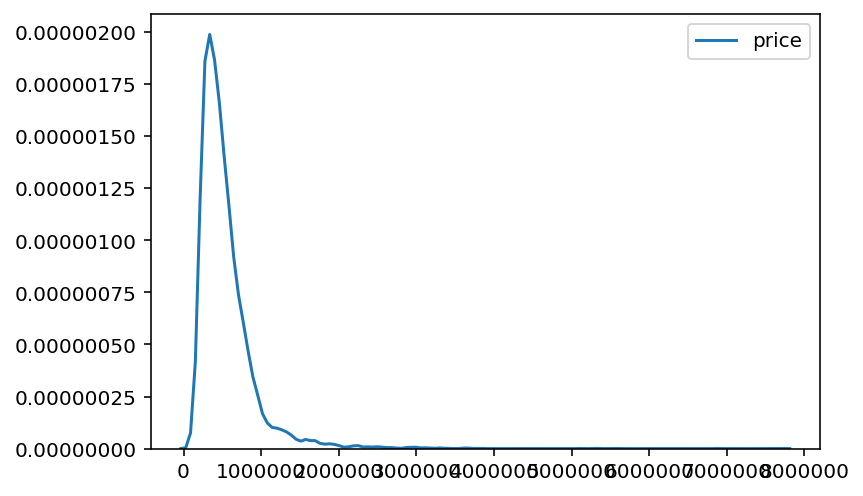

In [33]:
#Í∞ÄÍ≤© Î∂ÑÌè¨ÎèÑ Í∑∏ÎûòÌîÑ 
sns.kdeplot(y)
plt.show()

In [34]:
#log Î≥ÄÌôòÏùÑ Ï†ÅÏö©
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

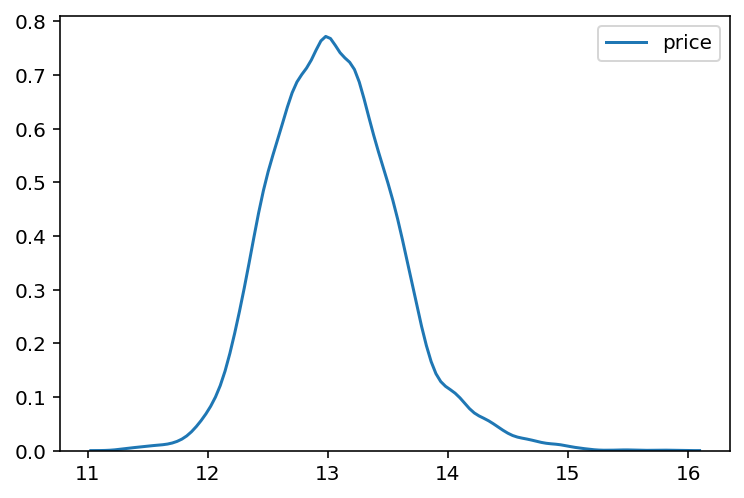

In [35]:
#logÎ≥ÄÌôòÎêú Í∞ÄÍ≤© Î∂ÑÌè¨ÎèÑ Í∑∏ÎûòÌîÑ 
sns.kdeplot(y)
plt.show()

In [36]:
#trainÎç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [37]:
#rmseÍ≤∞Í≥ºÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú mean_squared_error, Îç∞Ïù¥ÌÑ∞ÏÖã->ÌõàÎ†®ÏÖã+Í≤ÄÏ¶ùÏÖãÌïòÍ∏∞ ÏúÑÌï¥ÏÑú train_test_splitÏùÑ import
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('Ïñçüí¢')

Ïñçüí¢


In [38]:
#yÍ∞íÏùÑ log Î≥ÄÌôòÌï¥ÎÜ®Í∏∞ ÎïåÎ¨∏Ïóê ÏõêÎûòÎåÄÎ°ú Î≥µÍµ¨!
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('Ïñçüí¢')

Ïñçüí¢


In [39]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('Ïñçüí¢')

Ïñçüí¢


In [40]:
# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.  
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§. (Í≥†Ï†ïÌïòÏßÄ ÏïäÏúºÎ©¥ Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôîÏóê Îî∞Î•∏ Î≥ÄÌôîÍ∞Ä Ïò§ÏóºÎê† Ïàò ÏûàÎã§.)

#Î™®Îç∏ Ïù∏Ïä§ÌÑ¥Ïä§Î•º ÎßåÎì§Ïñ¥ÏÑú models Î¶¨Ïä§Ìä∏Ïóê ÎÑ£Í∏∞.
gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('Ïñçüí¢')

Ïñçüí¢


In [41]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [42]:
df = {}
#Í∞Å Î™®Îç∏Î≥Ñ ÌïôÏäµ, ÏòàÏ∏°
for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125576.03932336495}

In [43]:
def get_scores(models, train, y):
    df = {}

    for model in models:
        model_name = model.__class__.__name__

        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

    return score_df

In [44]:
#Îã§ÏñëÌïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î°ú Ïã§ÌóòÌïòÍ∏∞ÏúÑÌï¥ gridsearchcv ÌÅ¥ÎûòÏä§ ÌôúÏö©.
from sklearn.model_selection import GridSearchCV

print('Ïñçüí¢')

Ïñçüí¢


In [116]:
#ÌÉêÏÉâÌï† ÌååÎùºÎØ∏ÌÑ∞ Ï¢ÖÎ•òÎ•º ÎÑ£ÎäîÎã§.(ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏûÖÎ†•)
param_grid = {
    'n_estimators': [50, 75, 100, 150],
    'boosting_type': ['rf', 'gbdt', 'dart', 'goss'],
    'num_iterations': [100, 500, 750, 1000],
    'max_depth': [10, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [50, 100, 200]
}

In [117]:
model = LGBMRegressor(random_state=random_state)

print('Ïñçüí¢')

Ïñçüí¢


In [119]:
#param_grid : ÌÉêÏÉâÌï† ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï¢ÖÎ•ò (ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏûÖÎ†•)
#scoring : Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† ÏßÄÌëú
#cv : cross validationÏùÑ ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ train Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàÑÎäî Ï°∞Í∞ÅÏùò Í∞úÏàò
#verbose : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏßÑÌñâ Í≥ºÏ†ïÏùÑ Ï∂úÎ†•Ìï¥ÏÑú Î≥¥Ïó¨Ï§Ñ Î©îÏÑ∏ÏßÄÏùò Ïñë (Ïà´ÏûêÍ∞Ä ÌÅ¥ÏàòÎ°ù Îçî ÎßéÏùÄ Î©îÏÑ∏ÏßÄÎ•º Ï∂úÎ†•Ìï©ÎãàÎã§.)
#n_jobs : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏÇ¨Ïö©Ìï† CPUÏùò Í∞úÏàò
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=10)

grid_model.fit(train, y)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 530 tasks      | elapsed:    3.2s
[Parallel(n_jobs=10)]: Done 1530 tasks      | elapsed:    7.5s
[Parallel(n_jobs=10)]: Done 2450 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 2900 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 3450 tasks      | elapsed:  9.2min
[Parallel(n_jobs=10)]: Done 4100 tasks      | elapsed: 13.1min
[Parallel(n_jobs=10)]: Done 4850 tasks      | elapsed: 37.9min
[Parallel(n_jobs=10)]: Done 5700 tasks      | elapsed: 76.0min
[Parallel(n_jobs=10)]: Done 6650 tasks      | elapsed: 112.5min
[Parallel(n_jobs=10)]: Done 7700 tasks      | elapsed: 119.6min
[Parallel(n_jobs=10)]: Done 8640 out of 8640 | elapsed: 126.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=2020,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True...
                                     subsample_freq=0),
             iid='deprecated', n_jobs=10,
             param_grid={'boosting_type': ['rf', 'gbdt', 'dart', 'goss'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [10, 50, 100],
                         'n_estimators': [50, 75, 100, 150],
         

ÏúÑÏóêÏÑú Ïö∞Î¶¨Í∞Ä ÏûÖÎ†•Ìïú param_gridÏóê n_estimators Îëê Í∞ÄÏßÄ, max_depth Îëê Í∞ÄÏßÄÎ•º ÎÑ£ÏóàÏúºÎØÄÎ°ú Í∞ÄÎä•Ìïú Ï°∞Ìï©ÏùÄ Ï¥ù 2 √ó 2 = 4Í∞ÄÏßÄÏûÖÎãàÎã§.     

ÎòêÌïú, cross validationÏùÄ Í∞Å Í≤ΩÏö∞ÎßàÎã§ 5Î≤àÏùÑ ÏßÑÌñâÌïòÎãà Ï¥ù 20 fitsÎ•º ÏßÑÌñâÌïòÍ≤å Îê©ÎãàÎã§.

Ïó¨Í∏∞ÏóêÏÑú cross validationÏùÑ 5Î≤à ÏßÑÌñâÌïòÎäî Ïù¥Ïú†Îäî, Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌï¥ Îã® Ìïú Î≤àÎßå Ïã§ÌóòÏùÑ ÌïòÎäî Í≤ÉÎ≥¥Îã§ 5Î≤àÏùÑ ÏßÑÌñâÌï¥ÏÑú ÌèâÍ∑†ÏùÑ Ï∑®ÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÌôî Ïò§Ï∞®Î•º Ï∂îÏ†ïÌïòÎäî Îç∞Ïóê Îçî Ïã†Î¢∞ÎèÑÍ∞Ä ÎÜíÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Í∞ÑÎã®ÌïòÍ≤å, Ìïú Î≤àÎßå Ìï¥ Î≥¥Îäî Í≤ÉÎ≥¥Îã§Îäî Îã§ÏÑØ Î≤àÏùÑ Ìï¥Î≥¥Í≥† Íµ¨Ìïú ÌèâÍ∑†Í∞íÏù¥ Îçî Ï†ïÌôïÌïòÍ≤†Ï£†!


In [120]:
#4Í∞ÄÏßÄ Ï°∞Ìï©Ïóê ÎåÄÌïú Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
grid_model.cv_results_

{'mean_fit_time': array([0.08166556, 0.08849645, 0.04056158, ..., 4.64581704, 6.72632761,
        7.18916774]),
 'std_fit_time': array([0.01309379, 0.00985499, 0.00353854, ..., 0.57347047, 0.53552342,
        0.49171403]),
 'mean_score_time': array([0.        , 0.        , 0.        , ..., 0.49890008, 0.57057056,
        0.5116065 ]),
 'std_score_time': array([0.        , 0.        , 0.        , ..., 0.0439694 , 0.07347905,
        0.0495131 ]),
 'param_boosting_type': masked_array(data=['rf', 'rf', 'rf', ..., 'goss', 'goss', 'goss'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, ..., 0.1, 0.1, 0.1],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 10, 10, ..., 100, 100, 100],
              mask=[False, False, False, ..., False, False, False

In [121]:
#Ï†ïÎ≥¥Í∞Ä ÎÑàÎ¨¥ ÎßéÏïÑ Ïö∞Î¶¨Í∞Ä Î≥º Ìï≠Î™©Îßå Îî∞Î°ú Î∫¥Í∏∞.
#ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï©
params = grid_model.cv_results_['params']
params

[{'boosting_type': 'rf',
  'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 50,
  'num_iterations': 100,
  'num_leaves': 50},
 {'boosting_type': 'rf',
  'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 50,
  'num_iterations': 100,
  'num_leaves': 100},
 {'boosting_type': 'rf',
  'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 50,
  'num_iterations': 100,
  'num_leaves': 200},
 {'boosting_type': 'rf',
  'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 50,
  'num_iterations': 500,
  'num_leaves': 50},
 {'boosting_type': 'rf',
  'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 50,
  'num_iterations': 500,
  'num_leaves': 100},
 {'boosting_type': 'rf',
  'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 50,
  'num_iterations': 500,
  'num_leaves': 200},
 {'boosting_type': 'rf',
  'learning_rate': 0.01,
  'max_depth': 10,
  'n_estimators': 50,
  'num_iterations': 750,
  'num_leaves': 50},
 {'boosting_type': 'rf',
  'learning_

In [122]:
#Ï†ïÎ≥¥Í∞Ä ÎÑàÎ¨¥ ÎßéÏïÑ Ïö∞Î¶¨Í∞Ä Î≥º Ìï≠Î™©Îßå Îî∞Î°ú Î∫¥Í∏∞.
#Ï°∞Ìï©Ïóê Îî∞Î•∏ Ï†êÏàò
score = grid_model.cv_results_['mean_test_score']
score

array([        nan,         nan,         nan, ..., -0.02964561,
       -0.03050503, -0.0306545 ])

In [123]:
results = pd.DataFrame(params)
results['score'] = score

results

boosting_type  learning_rate  max_depth  n_estimators  num_iterations  \
0               rf           0.01         10            50             100   
1               rf           0.01         10            50             100   
2               rf           0.01         10            50             100   
3               rf           0.01         10            50             500   
4               rf           0.01         10            50             500   
...            ...            ...        ...           ...             ...   
1723          goss           0.10        100           150             750   
1724          goss           0.10        100           150             750   
1725          goss           0.10        100           150            1000   
1726          goss           0.10        100           150            1000   
1727          goss           0.10        100           150            1000   

      num_leaves     score  
0             50       NaN  
1            100       NaN  
2            200       NaN  
3             50       NaN  
4            100       NaN  
...          ...       ...  
1723         100 -0.030315  
1724         200 -0.030582  
1725          50 -0.029646  
1726         100 -0.030505  
1727         200 -0.030654  

[1728 rows x 7 columns]

In [124]:
#scoringÏù¥ negÏòÄÍ∏∞Ïóê -1 Í≥±ÌïòÍ≥† Î£®Ìä∏Ïó∞ÏÇ∞
results['RMSE'] = np.sqrt(-1 * results['score'])
results

boosting_type  learning_rate  max_depth  n_estimators  num_iterations  \
0               rf           0.01         10            50             100   
1               rf           0.01         10            50             100   
2               rf           0.01         10            50             100   
3               rf           0.01         10            50             500   
4               rf           0.01         10            50             500   
...            ...            ...        ...           ...             ...   
1723          goss           0.10        100           150             750   
1724          goss           0.10        100           150             750   
1725          goss           0.10        100           150            1000   
1726          goss           0.10        100           150            1000   
1727          goss           0.10        100           150            1000   

      num_leaves     score      RMSE  
0             50       NaN       NaN  
1            100       NaN       NaN  
2            200       NaN       NaN  
3             50       NaN       NaN  
4            100       NaN       NaN  
...          ...       ...       ...  
1723         100 -0.030315  0.174112  
1724         200 -0.030582  0.174876  
1725          50 -0.029646  0.172179  
1726         100 -0.030505  0.174657  
1727         200 -0.030654  0.175084  

[1728 rows x 8 columns]

In [125]:
#ÏõêÎûò 10ÎßåÏûêÏßÄ RMSEÏôÄ Í∞íÏù¥ Îã§Î•∏ Ïù¥Ïú†Îäî priceÎ•º logÎ≥ÄÌôòÌñàÏùåÏóêÎèÑ Ï§ëÍ∞ÑÏóê ÏõêÏÉÅÌÉúÎ°ú ÎêòÎèåÎ¶¨Îäî Í≥ºÏ†ïÏùÑ ÌïòÏßÄ ÏïäÏïÑ logÎ≥ÄÌôòÎêú Í≤ÉÎì§Ïùò RMSE  
#Ï¶â, RMSLEÎ•º Íµ¨ÌïúÍ≤ÉÏù¥Îã§.
results = results.rename(columns={'RMSE': 'RMSLE'})
results

boosting_type  learning_rate  max_depth  n_estimators  num_iterations  \
0               rf           0.01         10            50             100   
1               rf           0.01         10            50             100   
2               rf           0.01         10            50             100   
3               rf           0.01         10            50             500   
4               rf           0.01         10            50             500   
...            ...            ...        ...           ...             ...   
1723          goss           0.10        100           150             750   
1724          goss           0.10        100           150             750   
1725          goss           0.10        100           150            1000   
1726          goss           0.10        100           150            1000   
1727          goss           0.10        100           150            1000   

      num_leaves     score     RMSLE  
0             50       NaN       NaN  
1            100       NaN       NaN  
2            200       NaN       NaN  
3             50       NaN       NaN  
4            100       NaN       NaN  
...          ...       ...       ...  
1723         100 -0.030315  0.174112  
1724         200 -0.030582  0.174876  
1725          50 -0.029646  0.172179  
1726         100 -0.030505  0.174657  
1727         200 -0.030654  0.175084  

[1728 rows x 8 columns]

In [126]:
#RMSLEÍ∞Ä ÎÇÆÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
results = results.sort_values('RMSLE')
results

boosting_type  learning_rate  max_depth  n_estimators  num_iterations  \
1401          goss           0.01        100            50            1000   
1425          goss           0.01        100           100            1000   
1389          goss           0.01         50           150            1000   
1365          goss           0.01         50            75            1000   
1377          goss           0.01         50           100            1000   
...            ...            ...        ...           ...             ...   
427             rf           0.10        100           150             750   
428             rf           0.10        100           150             750   
429             rf           0.10        100           150            1000   
430             rf           0.10        100           150            1000   
431             rf           0.10        100           150            1000   

      num_leaves     score     RMSLE  
1401          50 -0.025992  0.161221  
1425          50 -0.025992  0.161221  
1389          50 -0.025992  0.161221  
1365          50 -0.025992  0.161221  
1377          50 -0.025992  0.161221  
...          ...       ...       ...  
427          100       NaN       NaN  
428          200       NaN       NaN  
429           50       NaN       NaN  
430          100       NaN       NaN  
431          200       NaN       NaN  

[1728 rows x 8 columns]

1. GridSearchCV Î™®Îç∏Î°ú `model`ÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ fitting Ìï©ÎãàÎã§.
3. params, scoreÏóê Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§. 
4. Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïú ÌõÑ Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìïú `results`Î•º Î∞òÌôòÌï©ÎãàÎã§.


def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
  1  grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

param_grid = {
   'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

results = results.sort_values('RMSLE')
results

In [127]:
#Í∞ÄÏû• Ï¢ãÏùÄ Ï°∞Ìï©Ïù¥ 10, 100Ïù¥ÎØÄÎ°ú Ïù¥ ÌååÎùºÎØ∏ÌÑ∞Î°ú Íµ¨ÏÑ±Îêú Î™®Îç∏ Ï§ÄÎπÑ, ÌïôÏäµ, ÏòàÏ∏°
model = LGBMRegressor(max_depth=100, n_estimators=50, boosting_type='goss', learning_rate=0.01, num_iterations=1000, num_leaves=50, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.12765951, 13.0930435 , 14.17214333, ..., 13.04347147,
       12.66387218, 12.97361865])

In [128]:
#logÎ≥ÄÌôòÌïú Í∞íÏùÑ ÏòàÏ∏°Ìïú Í≤ÉÏù¥ÎØÄÎ°ú ÏõêÏÉÅÎ≥µÍ∑Ä!
prediction = np.expm1(prediction)
prediction

array([ 502654.09162818,  485551.89125866, 1428510.18970572, ...,
        462068.90771028,  316117.42443372,  430893.53699792])

In [129]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [130]:
submission['price'] = prediction
submission.head()
#price ÏπºÎüºÏóê Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°Ìïú Í∞í ÎÑ£Í∏∞

id         price
0  15035  5.026541e+05
1  15036  4.855519e+05
2  15037  1.428510e+06
3  15038  3.001034e+05
4  15039  3.327872e+05

submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)
#ÌååÏùº Ïù¥Î¶ÑÏóê RMSLEÍ∞íÏùÑ ÎÑ£Ïñ¥ÏÑú Ï†ÄÏû•

In [131]:
"""
ÏïÑÎûòÏùò Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎäî `save_submission(model, train, y, test, model_name, rmsle)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Ï£ºÏÑ∏Ïöî.
1. Î™®Îç∏ÏùÑ `train`, `y`Î°ú ÌïôÏäµÏãúÌÇµÎãàÎã§.
2. `test`Ïóê ÎåÄÌï¥ ÏòàÏ∏°Ìï©ÎãàÎã§.
3. ÏòàÏ∏°Í∞íÏùÑ `np.expm1`ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, `submission_model_name_RMSLE_100000.csv` ÌòïÌÉúÏùò `csv` ÌååÏùºÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
"""

# ÏΩîÎìú ÏûëÏÑ±
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [132]:
save_submission(model, train, y, test, 'lgbm', rmsle='0.161221')
#ÏòàÏ∏°Í≤∞Í≥º Ï†ÄÏû•

/home/ssac19/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.161221.csv saved!


private: 113348.89868  
public: 110157.09210